In [4]:
GPT2_VERSION = 'distilgpt2'
FILTER = 'filtered'


In [5]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

In [6]:
fname = f'winobias_data/attention_intervention_results_{GPT2_VERSION}_{FILTER}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 61
Mean total effect: 0.118

INDIRECT Effect (mean = 0.0005050957363098875)
Top 10 heads:
   3 1: 0.024 (p=0.0000)
   2 6: 0.005 (p=0.0000)
   3 6: 0.003 (p=0.0015)
   2 3: 0.003 (p=0.0036)
   4 2: 0.002 (p=0.0268)
   4 0: 0.001 (p=0.1741)
   3 10: 0.001 (p=0.3590)
   0 8: 0.001 (p=0.4278)
   2 8: 0.001 (p=0.4458)
   3 8: 0.001 (p=0.4545)

DIRECT Effect (mean = 0.11791217396161324)
Top 10 heads:
   3 1: 0.094 (p=0.0227)
   3 6: 0.114 (p=0.3639)
   2 6: 0.114 (p=0.3883)
   4 2: 0.116 (p=0.4275)
   2 3: 0.116 (p=0.4477)
   4 0: 0.117 (p=0.4779)
   3 10: 0.118 (p=0.4908)
   2 9: 0.118 (p=0.4936)
   3 8: 0.118 (p=0.4981)
   1 1: 0.118 (p=0.4991)


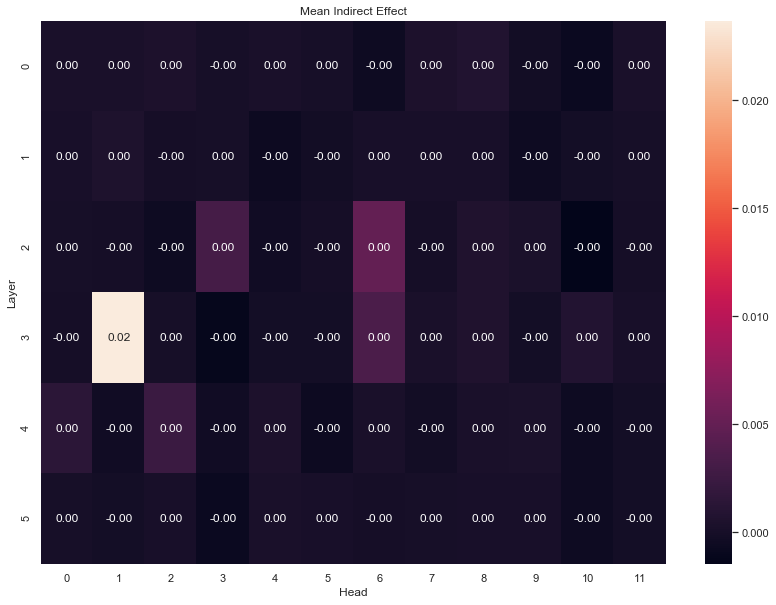

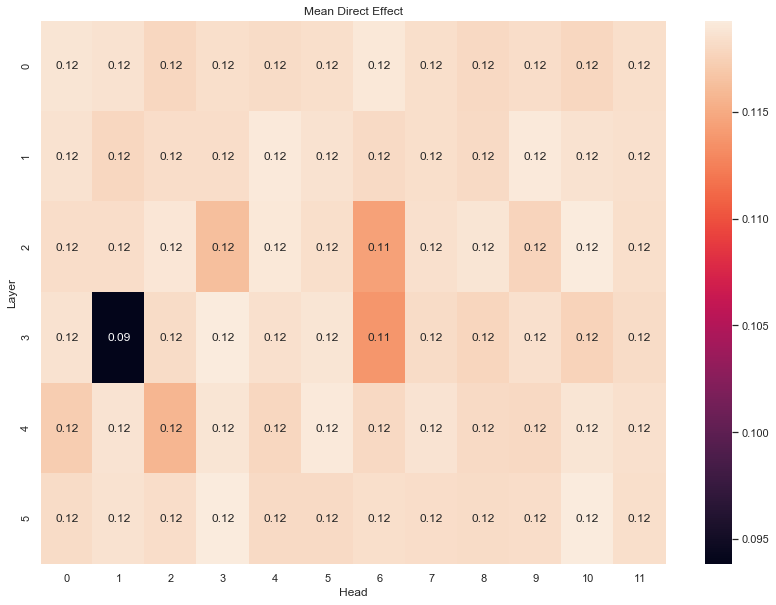

In [7]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 61
Mean total effect: 0.118


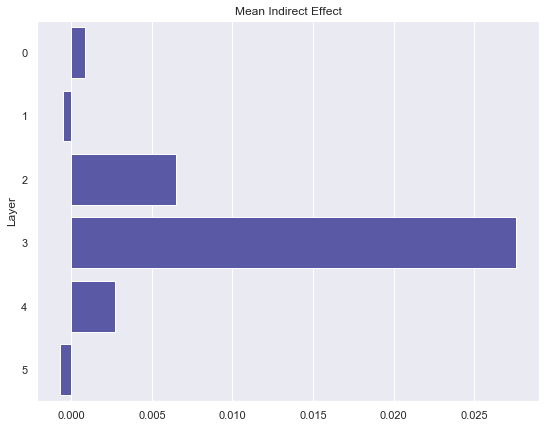

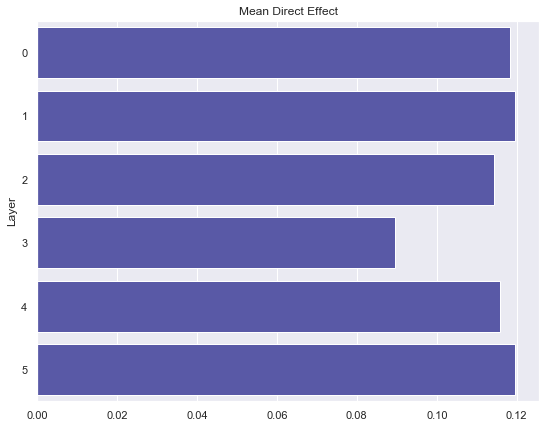

In [8]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.30771
p(c2|x') / p(c1|x') = 0.34087

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.108


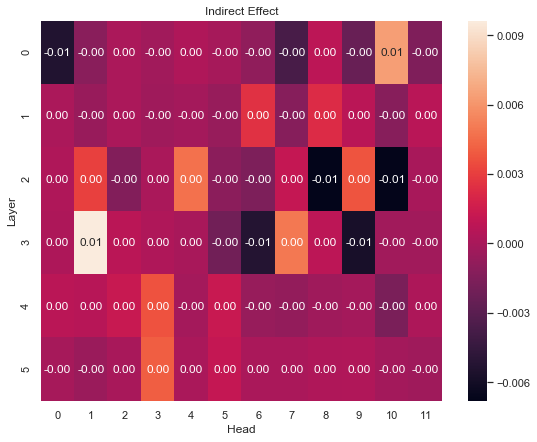

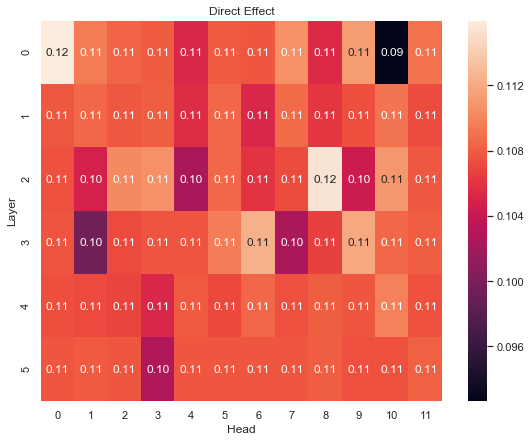

In [9]:
report_intervention(results[0])

x : The farmer offered apples to the housekeeper, because she
x': The farmer offered apples to the housekeeper, because he
c1: might like them .
c2: had too many of them .

p(c2|x) / p(c1|x) = 4.14586
p(c2|x') / p(c1|x') = 4.34357

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.048


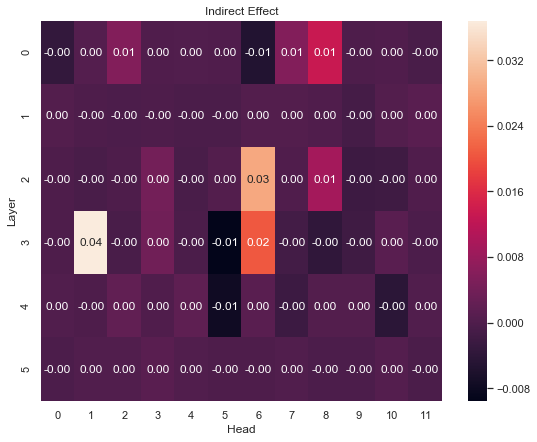

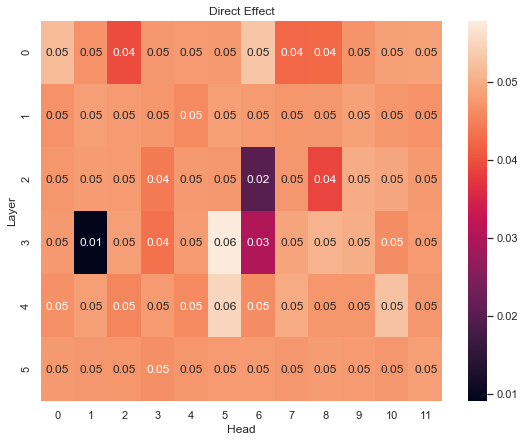

In [10]:
report_intervention(results[1])

x : The CEO helped the nurse because she
x': The CEO helped the nurse because he
c1: needed help .
c2: wanted to help .

p(c2|x) / p(c1|x) = 1.30693
p(c2|x') / p(c1|x') = 1.84857

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.414


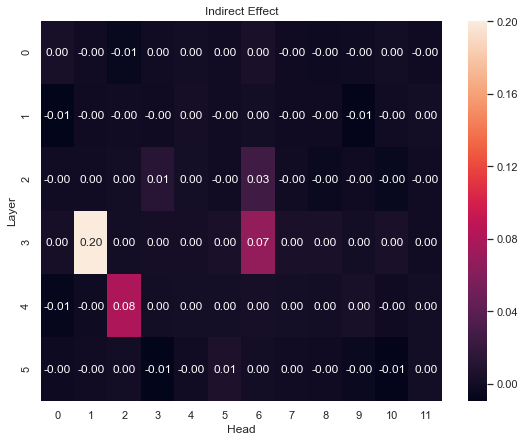

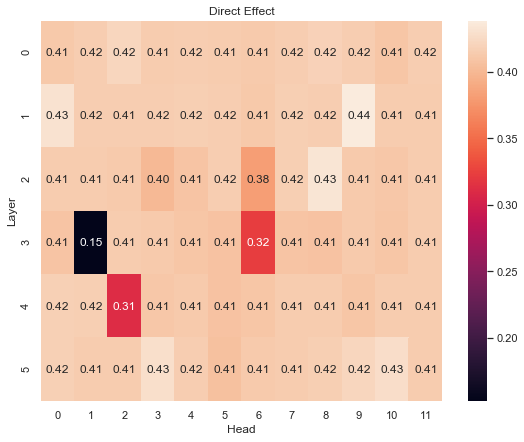

In [11]:
report_intervention(results[2])

x : The auditor caught the developer cheating because she
x': The auditor caught the developer cheating because he
c1: discovered the key documents .
c2: is dishonest .

p(c2|x) / p(c1|x) = 1.48372
p(c2|x') / p(c1|x') = 1.58108

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.066


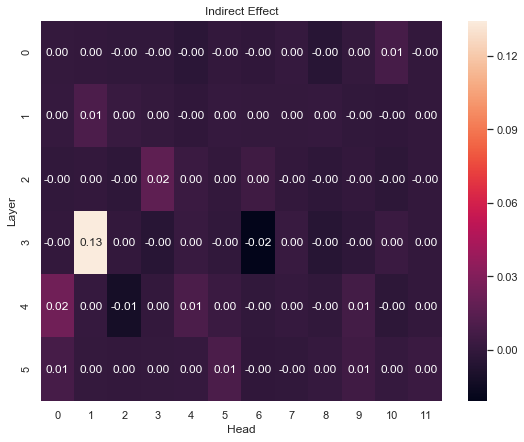

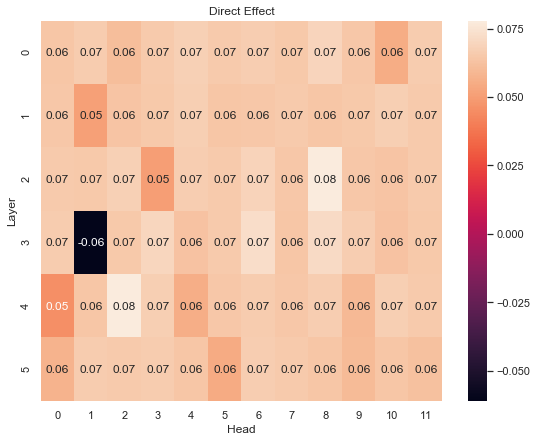

In [12]:
report_intervention(results[3])
